<a href="https://colab.research.google.com/github/felipeescallon/Pertussis-Model/blob/main/SIR_Pertussis_Model_(simplified_6x6_ODE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertussis Model 

Based on the paper: https://pubmed.ncbi.nlm.nih.gov/11561978/

*By: Andrés Felipe Escallón Portilla*

**March 2021**

SIR Pertussis Model (simplified 6x6 ODE):

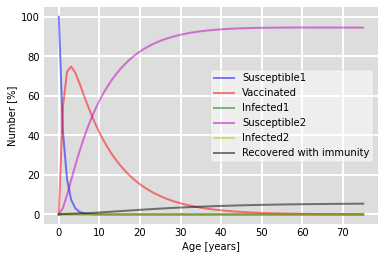

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
#N = 15490000 #1996 (Netherlands)

#B=80000 #new borns 
B=100 #%

# Initial number of susceptible, infected and recovered individuals
S10, V0, I10, S20, I20, R0 = B, 0, 0 , 0, 0, 0

# Model parameters:

v_mean, lambda_mean, sigmaV, sigmaI, rho1, rho2 = 0.85, 0.003, 0.1, 0.05, 25, 25

# A grid of time points (in years)
L=75
a = np.linspace(0, L, L)

# SIR Pertussis Model: 6x6 Ordinary Differential Equations (ODE)
def deriv(y, a, v_mean, lambda_mean, sigmaV, sigmaI, rho1, rho2): #a=age

    S1, V, I1, S2, I2, R = y
    dS1da = -v_mean * S1 - lambda_mean * S1
    dVda = v_mean * S1 - sigmaV * V
    dI1da = lambda_mean * S1 - rho1 * I1
    dS2da = sigmaV * V + sigmaI * R - lambda_mean * S2
    dI2da = lambda_mean * S2 - rho1 * I2
    dRda =  rho1 * I1 + rho2 * I2 - sigmaI * R

    return dS1da, dVda, dI1da, dS2da, dI2da, dRda

# Initial conditions vector
y0 = S10, V0, I10, S20, I20, R0 
# Integrate the SIR equations over the time grid, a.
ret = odeint(deriv, y0, a, args=(v_mean, lambda_mean, sigmaV, sigmaI, rho1, rho2))
S1, V, I1, S2, I2, R = ret.T

# Plotting data on six separate curves for S1(a), V(a), I1(a), S2(a), I2(a), and R(a)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(a, S1, 'b', alpha=0.5, lw=2, label='Susceptible1')
ax.plot(a, V, 'r', alpha=0.5, lw=2, label='Vaccinated')
ax.plot(a, I1, 'g', alpha=0.5, lw=2, label='Infected1')
ax.plot(a, S2, 'm', alpha=0.5, lw=2, label='Susceptible2')
ax.plot(a, I2, 'y', alpha=0.5, lw=2, label='Infected2')
ax.plot(a, R, 'k', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Age [years]')
ax.set_ylabel('Number [%]') #B=100
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()